# Exploring Statistics for Brazilian E-commerce 


**About Data**

The dataset is real, commercial and publicly published by Olist from Brazil. Olist is largest department store in Brazilian marketplaces.
They have their own warehouses and have contracts with small merchants for shipping the products. For shipping, Olist provide logistics to the merchants.

For more details about the data: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv 

**Questions** 
1. Which is the best and worst sold product category?
2. How is the sales performance over the two years?
3. How is the delivery performance by the years?
4. Does product photo quantity and product description affect sales of that category?



**Import the libraries** 

In [98]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Data unfolding**

In [99]:
customer_location_data = pd.read_csv("olist_customers_dataset.csv")
customer_location_data.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [100]:
seller_location_data = pd.read_csv("olist_geolocation_dataset.csv")
seller_location_data.head()
#df1.shape
#df1.info()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [101]:
order_item_data = pd.read_csv("olist_order_items_dataset.csv")
order_item_data.head()
order_item_data.info()
#order_item.shape
#order_item['order_item_id'].nunique()
#order_item.isnull().sum() #displays sum of missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [102]:
payment_data = pd.read_csv("olist_order_payments_dataset.csv")
payment_data.head()
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [103]:
order_delivery_data = pd.read_csv("olist_orders_dataset.csv")
order_delivery_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [104]:
order_delivery_data.order_id.nunique()

99441

In [105]:
order_delivery_data.customer_id.nunique() #Each customer ordered only once

99441

In [106]:
product_detailed_info_data = pd.read_csv("olist_products_dataset.csv")
product_detailed_info_data.head()
#product_detailed_info.shape #32951 with 9 columns
#product_detailed_info.product_category_name.nunique() #73 products
product_detailed_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [107]:
product_category_data = pd.read_csv("product_category_name_translation.csv")
product_category_data.head()
#product_category.shape

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [108]:
seller_location1_data = pd.read_csv("olist_sellers_dataset.csv")
seller_location1_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Q1.What are the product categories? Which product categories are sold best? And worst?**
*The product list indicates 71 product category names.*

*Join data sets for the first question, product id is the common column to join upon*

In [109]:
product_sell_df = product_detailed_info_data.merge(order_item_data, on='product_id', how='left')

In [110]:
#product_sell_df.info()
#product_sell_df.isnull().sum()
product_sell_df.head() #Spanish names

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [111]:
product_sell_english_df = product_sell_df.merge(product_category_data, on='product_category_name', how='right')#to add english product category names

In [112]:
product_sell_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e3e020af31d4d89d2602272b315c3f6e,beleza_saude,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79,health_beauty
1,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22,health_beauty
2,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18,health_beauty
3,36555a2f528d7b2a255c504191445d39,beleza_saude,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11,health_beauty
4,e586ebb6022265ae1eea38f46ffe3ead,beleza_saude,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64,health_beauty


*1.4% data has null values in 2 to 4 columns of product_sell.* 

In [113]:
product_categories_df = product_sell_english_df.drop(['product_id','product_name_lenght', 'product_category_name', 'product_description_lenght', 'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','order_id','seller_id','shipping_limit_date','price','freight_value'], axis=1)

In [114]:
product_categories_df.head()

,order_item_id,product_category_name_english
0,1,health_beauty
1,1,health_beauty
2,1,health_beauty
3,1,health_beauty
4,1,health_beauty


**Discovered the pattern**

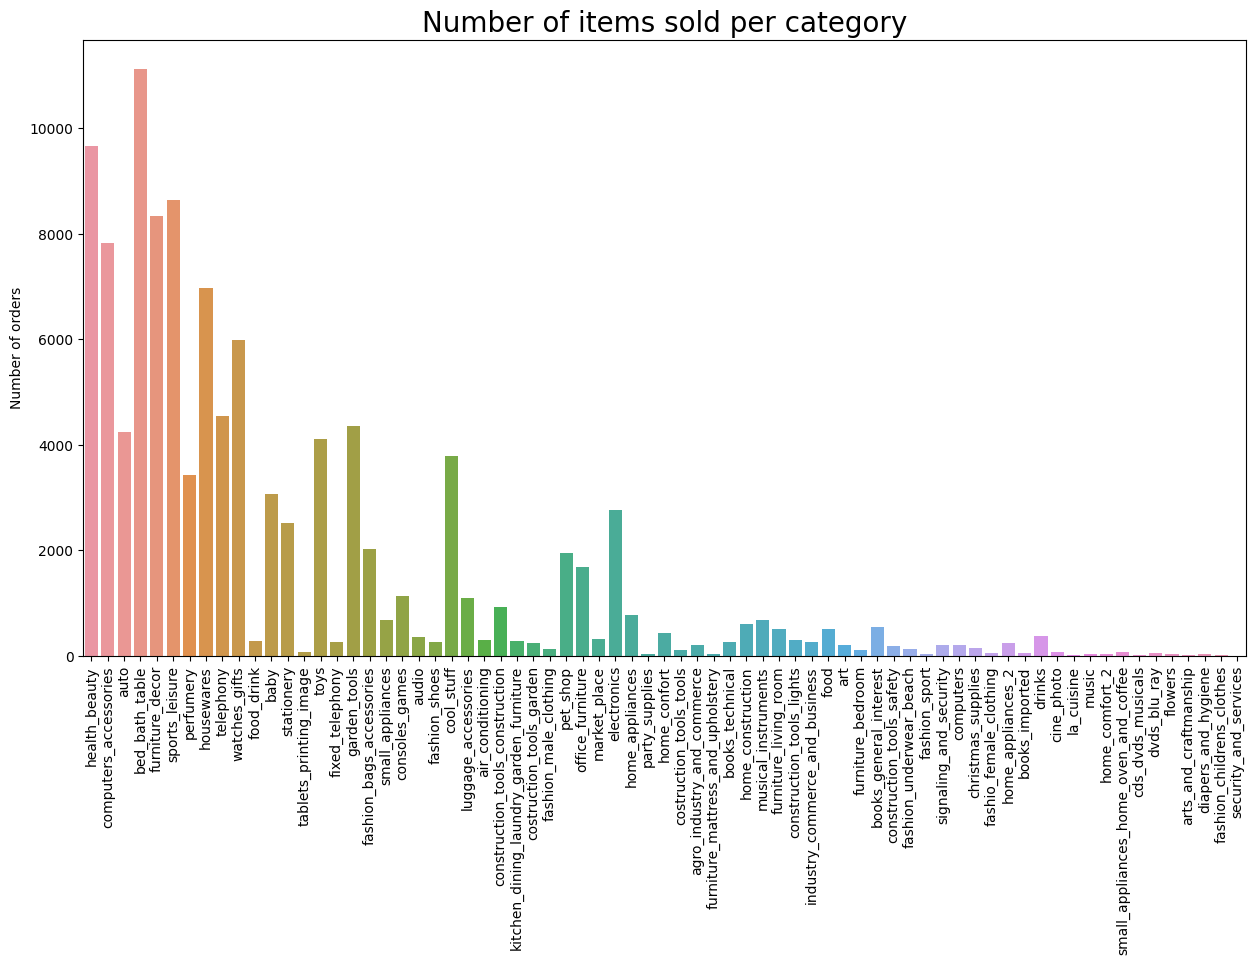

In [115]:
# Plot number of items sold per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x= product_categories_df['product_category_name_english']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("Number of orders", fontsize = 10); # set label for y-axis
f1.set_title('Number of items sold per category', fontsize=20); # set title

In [116]:
product_categories_df.to_csv('product_category_sells.csv') #to import it into tableau.

**Question 2: Sales performance over the 2016-2018 years**

This question needed 'order_delivery_data.csv'. The data is self sufficient hence does not need cleaning or merging. It is directly imported to Tableau.

**Question 3: Delivery performance**

In [117]:
delivery_performance_df = order_item_data.merge(order_delivery_data, on='order_id', how='right')

In [118]:
delivery_performance_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [119]:
delivery_performance_df.to_csv("delivery_performance.csv")#to import it into tableau.

**Question 4: Is product sale based on photo quantity and written product description?**

In [120]:
product_sell_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e3e020af31d4d89d2602272b315c3f6e,beleza_saude,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79,health_beauty
1,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22,health_beauty
2,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18,health_beauty
3,36555a2f528d7b2a255c504191445d39,beleza_saude,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11,health_beauty
4,e586ebb6022265ae1eea38f46ffe3ead,beleza_saude,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64,health_beauty


In [121]:
product_sell_english_df = payment_data.merge(product_sell_english_df, on='order_id', how='right') 

In [122]:
product_sell_english_df.to_csv("product_detailed_eng.csv")#to import it into tableau.